In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, plot_roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, plot_confusion_matrix
from matplotlib import pyplot as plt
import pandas as pd
import utils
import preprocessing

In [3]:
df = preprocessing.preprocessing_base_parte_1(utils.feature_engineering(utils.get_data()))

In [4]:
params = { 'n_neighbors': range(1,10), 'weights': ('uniform', 'distance'), 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'p': range(1,5) }
model = KNeighborsClassifier()

In [5]:
gscv = GridSearchCV(model, params, scoring='roc_auc', n_jobs=-1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('tiene_alto_valor_adquisitivo',1), df['tiene_alto_valor_adquisitivo'], random_state=112)

In [7]:
%%time
gscv.fit(X_train, y_train)
score = roc_auc_score(y_test, gscv.predict_proba(X_test)[:,1])

CPU times: user 7.3 s, sys: 794 ms, total: 8.09 s
Wall time: 58min 45s


In [8]:
gscv.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}

In [9]:
score

0.8841482929990394

In [10]:
print(classification_report(y_test,gscv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6182
           1       0.72      0.60      0.65      1959

    accuracy                           0.85      8141
   macro avg       0.80      0.76      0.78      8141
weighted avg       0.84      0.85      0.84      8141



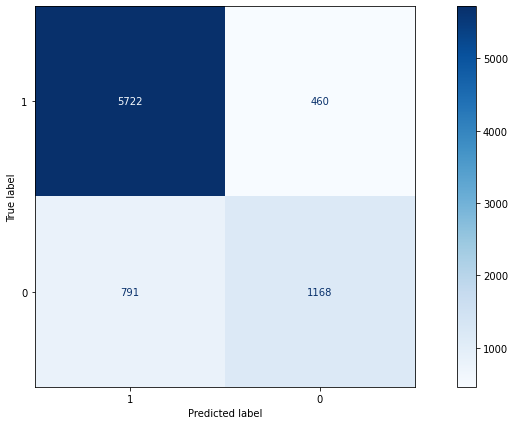

In [11]:
fig, ax = plt.subplots(figsize=(15,7))
plt.grid(False)
plot_confusion_matrix(gscv, X_test, y_test, cmap=plt.cm.Blues, display_labels=['1', '0'], ax=ax)
plt.show()

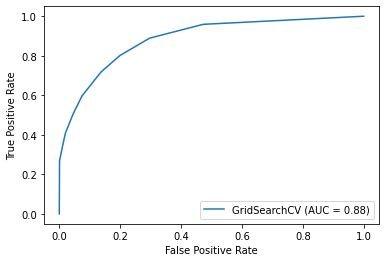

In [12]:
plot_roc_curve(gscv, X_test, y_test)